In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../Data/AQI and Lat Long of Countries_cleaned.csv")
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,2,1,1,36,1,0,1,51,2,44.7444,44.2031
1,Brazil,Presidente Dutra,41,1,1,1,5,1,1,1,41,1,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,1,1,1,5,1,1,1,41,1,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,2,1,1,39,1,2,1,66,2,37.1667,15.1833
4,Poland,Przasnysz,34,1,1,1,34,1,0,1,20,1,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,2,1,1,34,1,5,1,54,2,37.5516,-77.3285
16691,Slovakia,Martin,71,2,1,1,39,1,1,1,71,2,49.0650,18.9219
16692,Slovakia,Martin,71,2,1,1,39,1,1,1,71,2,36.3385,-88.8513
16693,France,Sceaux,50,1,1,1,20,1,5,1,50,1,48.7786,2.2906


In [12]:
df_numericals = df.select_dtypes(include=[np.number])
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numericals),columns=df_numericals.columns)
x = df_scaled.drop(columns = ['AQI Value'])
y = df_scaled['AQI Value']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [14]:
xgb_model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators =100,
    learning_rate = 0.1,
    max_depth = 6,
    random_state = 42
)

In [15]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [16]:
y_pred = xgb_model.predict(x_test)

In [17]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.007952529184268005

In [18]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.0008111632090959899

In [19]:
r2 = r2_score(y_test,y_pred)
r2

0.9907320277972756

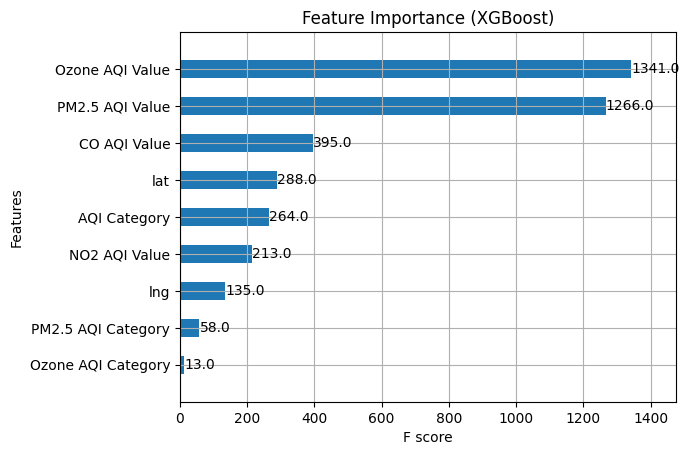

In [21]:
xgb.plot_importance(xgb_model,height=0.5,title = "Feature Importance (XGBoost)")
plt.show()

In [ ]:
results_df = pd.DataFrame({
    "Actual AQI" : y_test,
    "Predicted AQI" : y_pred
})

In [23]:
results_df.to_csv("../Data/AQI_Predictions.csv",index=False)

In [25]:
import joblib
joblib.dump(xgb_model,"../Model/AQI_Predictions.pkl")

['../Model/AQI_Predictions.pkl']